##### 다음의 문제를 풀되 random_state값은 2020, 테스트 데이터의 크기는 전체 데이터의 20%로 할것

In [47]:
import numpy as np
import tensorflow as tf

In [48]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

##### 1. iris데이터에 대해서 5겹 교차검증(K-fold cross validation)을 사용하여 분류하시오

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [7]:
import pandas as pd
df = pd.read_csv('../Deep-Learning/dataset/iris.csv',names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [15]:
# 데이터 입력
dataset = df.values
X = np.array(dataset[:,0:4], dtype=np.float64)
Y_obj = dataset[:,4]

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold

In [18]:
# 문자열 변환
e = LabelEncoder().fit(Y_obj)
Y = np.array(e.transform(Y_obj), dtype=np.float64)

In [19]:
# 5개로 쪼갬
n_fold = 5
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [20]:
# 빈 accuracy 리스트
accuracy = []

In [22]:
# 모델의 설정, 컴파일, 실행
for train, test in skf.split(X, Y):
    model = Sequential([
        Dense(24, input_dim=4, activation='relu'),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
        optimizer='adam', metrics=['accuracy'])
    model.fit(X[train], Y[train], epochs=100, batch_size=5, verbose=0)
    
    print(len(X[train]), len(X[test]), end='  ')
    k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test], verbose=0)[1])
    print(k_accuracy)
    accuracy.append(k_accuracy)

120 30  0.3667
120 30  0.3667
120 30  0.5000
120 30  0.4000
120 30  0.4667


In [23]:
acc = np.array(accuracy, dtype=np.float64)
np.mean(acc)

0.42001999999999995

##### 2. Fashion MINIST Dataset을 CNN으로 분류하시오

In [51]:
from tensorflow.keras.datasets import mnist

In [52]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [53]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
import numpy as np
import tensorflow as tf
from tensorflow import keras


In [61]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [62]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [63]:
train_images.shape

(60000, 28, 28)

In [64]:
len(train_labels)

60000

In [65]:
unique, counts = np.unique(train_labels, return_counts=True)
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [66]:
test_images.shape

(10000, 28, 28)

In [68]:
## one hot encoding
train_images = train_images / 255.0
test_images = test_images / 255.0

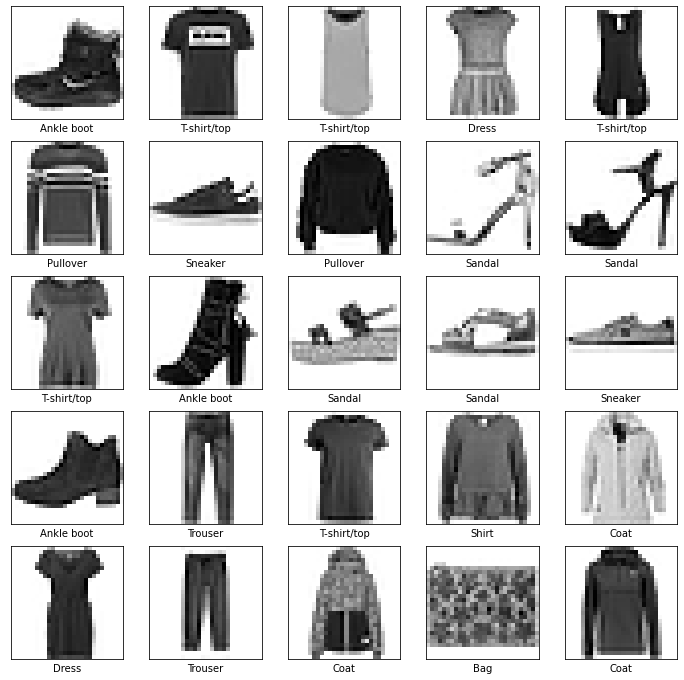

In [69]:
# 훈련 세트에서 처음 25개 이미지와 클래스 이름을 출력
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [70]:
x_train = train_images.reshape(-1, 28, 28, 1)
x_test = test_images.reshape(-1, 28, 28, 1)
y_train = keras.utils.to_categorical(train_labels)
y_test = keras.utils.to_categorical(test_labels)
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [71]:
# 손글씨 MNIST 모델과 동일하게
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), 
                              input_shape=(28, 28, 1), 
                              activation='relu'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [72]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
model.fit(x_train, y_train, batch_size=64, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 49s 825us/sample - loss: 0.4956 - accuracy: 0.8247
Epoch 2/10
60000/60000 [==============================] - 49s 816us/sample - loss: 0.3321 - accuracy: 0.8817
Epoch 3/10
60000/60000 [==============================] - 48s 802us/sample - loss: 0.2850 - accuracy: 0.8964
Epoch 4/10
60000/60000 [==============================] - 48s 803us/sample - loss: 0.2543 - accuracy: 0.9071
Epoch 5/10
60000/60000 [==============================] - 48s 803us/sample - loss: 0.2307 - accuracy: 0.9150
Epoch 6/10
60000/60000 [==============================] - 48s 803us/sample - loss: 0.2108 - accuracy: 0.9229
Epoch 7/10
60000/60000 [==============================] - 48s 803us/sample - loss: 0.1937 - accuracy: 0.9295
Epoch 8/10
60000/60000 [==============================] - 49s 818us/sample - loss: 0.1818 - accuracy: 0.9316
Epoch 9/10
60000/60000 [==============================] - 48s 792us/sample - loss: 0.1666 - accuracy: 0.9

In [74]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/10000 - 2s - loss: 0.2147 - accuracy: 0.9258

테스트 정확도: 0.9258


##### 3. IMDB영화 리뷰 데어터에 대하여 딥 러닝을 이용하여 감성분석을 하시오. (Kaggle의 Bag of Words Meets Bags of Popcorn에서 labeledTrainData.tsv 파일을 사용할것)

In [17]:
from keras.datasets import imdb

Using TensorFlow backend.


In [21]:
import pandas as pd
df = pd.read_csv('../Deep-Learning/dataset/labeledTrainData.tsv', delimiter = '\t')
df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [25]:
df.tail(3)

,id,sentiment,review
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...
24999,8478_8,1,I saw this movie as a child and it broke my he...


In [26]:
df.columns.values

array(['id', 'sentiment', 'review'], dtype=object)

In [28]:
df['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [29]:
df['review'][0][:700]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like"